# **HIV PREDICTION**


---

### IMPORTING NECESSARY LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix

######  Loading the Dataset

In [7]:
data = pd.read_csv("HIV_dataset.csv")
data

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
...,...,...,...,...,...,...,...,...,...,...
693,19,UNMARRIED,YES,Illiteracy,NO,NO,Internet,Heterosexual,NO,POSITIVE
694,47,MARRIED,NO,College Degree,NO,YES,Bar,Bisexual,NO,NEGATIVE
695,34,UNMARRIED,YES,Senior High School,YES,YES,Park,Homosexual,YES,NEGATIVE
696,25,MARRIED,NO,Junior High School,NO,NO,Public Bath,Heterosexual,YES,POSITIVE


In [3]:
data.shape  # to find number of rows and columns in the dataset

(698, 10)

In [4]:
data.describe() # to describe the dataset

,Age
count,698.000000
mean,40.022923
std,18.154906
min,12.000000
25%,25.000000
50%,38.000000
75%,54.000000
max,80.000000


In [5]:
data.info() # to find the details of columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  676 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


---

#### Checking if there is any null value in the dataset

In [6]:
data.isnull().sum()

Age                                0
Marital Staus                      0
STD                                0
Educational Background             0
HIV TEST IN PAST YEAR              0
AIDS education                     0
Places of seeking sex partners    22
SEXUAL ORIENTATION                 0
Drug- taking                       0
Result                             0
dtype: int64

#There are 22 null values in the column 'Places of seeking sex partners'.

In [7]:
# removing all 22 null value rows from dataset
data = data.dropna() 

In [8]:
# null values in dataset after dropping null values
data.isnull().sum()

Age                               0
Marital Staus                     0
STD                               0
Educational Background            0
HIV TEST IN PAST YEAR             0
AIDS education                    0
Places of seeking sex partners    0
SEXUAL ORIENTATION                0
Drug- taking                      0
Result                            0
dtype: int64

---

In [9]:
data.head() # first five rows of the dataset

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
5,15,UNMARRIED,YES,Junior High School,NO,NO,Public bath,Bisexual,NO,NEGATIVE
6,15,UNMARRIED,YES,Junior High School,NO,NO,Public Bath,Heterosexual,YES,NEGATIVE


In [10]:
data.tail() # last five rows of the dataset

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
693,19,UNMARRIED,YES,Illiteracy,NO,NO,Internet,Heterosexual,NO,POSITIVE
694,47,MARRIED,NO,College Degree,NO,YES,Bar,Bisexual,NO,NEGATIVE
695,34,UNMARRIED,YES,Senior High School,YES,YES,Park,Homosexual,YES,NEGATIVE
696,25,MARRIED,NO,Junior High School,NO,NO,Public Bath,Heterosexual,YES,POSITIVE
697,46,Cohabiting,YES,Senior High School,YES,NO,Internet,Homosexual,NO,POSITIVE


---

In [5]:
# changing values with same value but different name 

data["Drug- taking"] = data["Drug- taking"].replace("Yes","YES") 
data["Drug- taking"] = data["Drug- taking"].replace("No","NO")
data["Result"] = data["Result"].replace("Positive","POSITIVE")
data["Result"] = data["Result"].replace("Negative","NEGATIVE") 
data["STD"] = data["STD"].replace("No","NO")
data["STD"] = data["STD"].replace("Yes","YES")                            
data["Places of seeking sex partners"] = data["Places of seeking sex partners"].replace("Public bath","Public Bath")

In [12]:
(data["Result"]=="POSITIVE").value_counts() # Finding number of persons who are "HIV POSITIVE"

Result
True     338
False    338
Name: count, dtype: int64

#In this dataset '338' persons are HIV positive and '338' persons are HIV negative

<Axes: xlabel='Result', ylabel='count'>

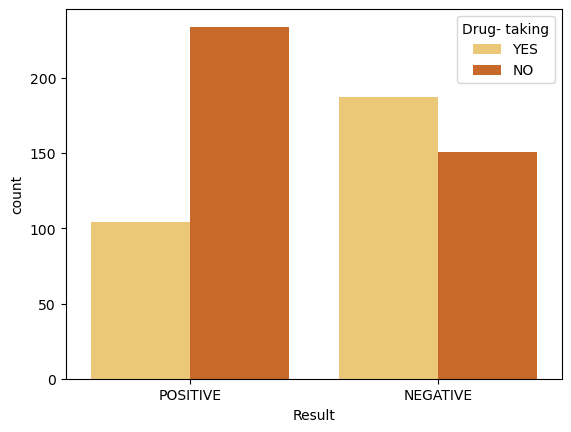

In [158]:
sns.countplot(x=data["Result"],hue=data["Drug- taking"],palette='YlOrBr')

#In this dataset persons who don't use drugs got more 'HIV Positive' cases than others who uses drugs

---

<Axes: xlabel='Places of seeking sex partners', ylabel='count'>

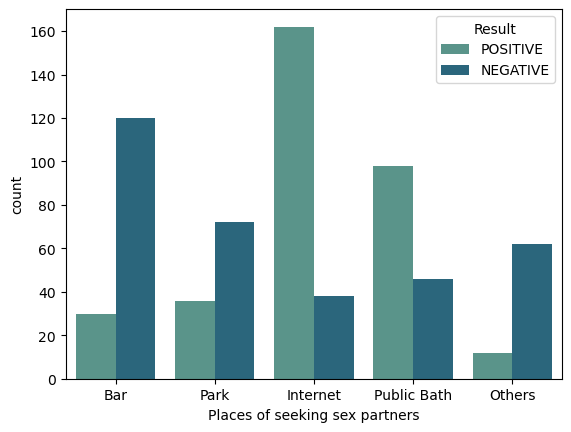

In [159]:
sns.countplot(x=data["Places of seeking sex partners"],hue=data["Result"],palette='crest')

#In this dataset people found 'seeking sex partners' in 'Internet' got more HIV positive cases.

---

<Axes: xlabel='Age', ylabel='count'>

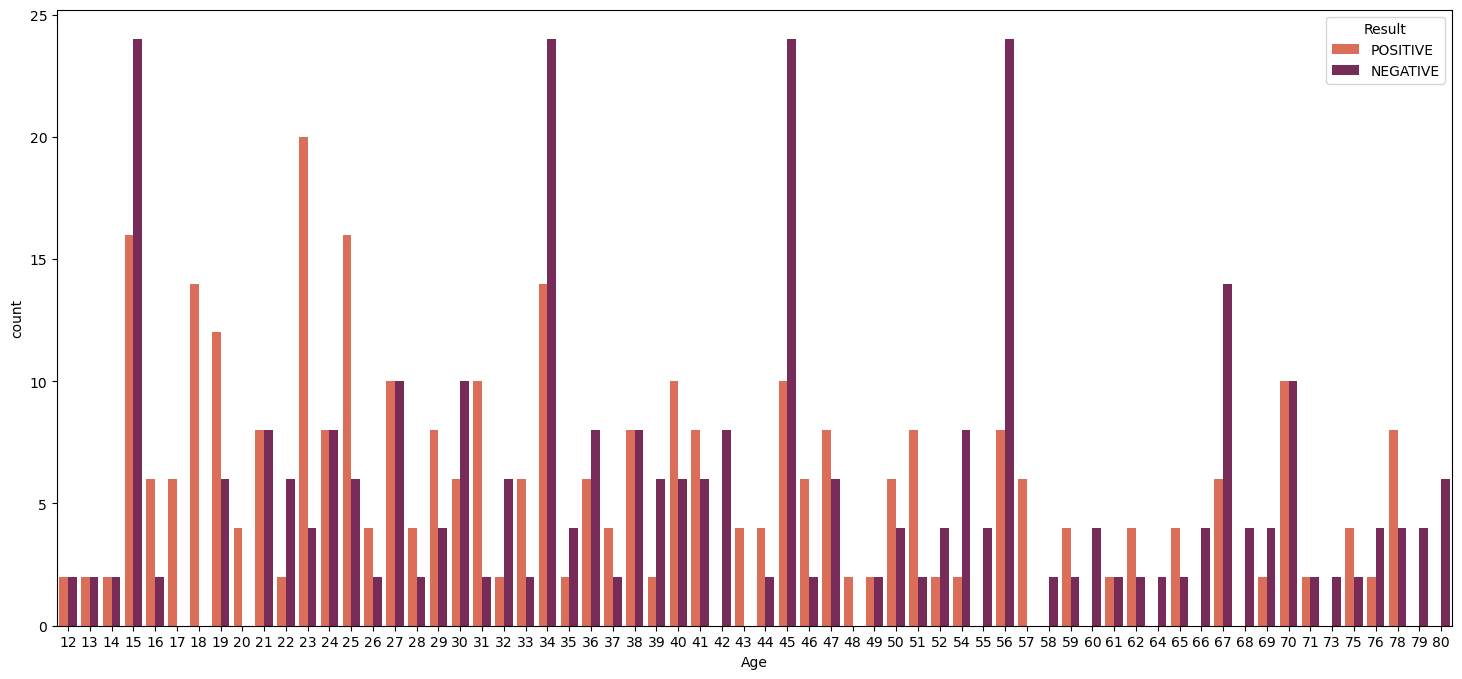

In [160]:
plt.figure(figsize=(18,8))
sns.countplot(x=data["Age"],hue=data["Result"],palette='rocket_r')

#In this dataset people who are '23' years old got most number of HIV positive cases.
#In this dataset The youngest persons who got HIV positive cases are '12' year old and oldest people who got HIV positive cases are of 78 years old.

---

###  DATA PREPROCESSING

#### Splitting dataset to 'Features'(x) and 'Target'(y)#### Splitting dataset to 'Features'(x) and 'Target'(y)

In [161]:
x = data.drop("Result",axis=1)
y = data["Result"]

In [162]:
x

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES
5,15,UNMARRIED,YES,Junior High School,NO,NO,Public Bath,Bisexual,NO
6,15,UNMARRIED,YES,Junior High School,NO,NO,Public Bath,Heterosexual,YES
...,...,...,...,...,...,...,...,...,...
693,19,UNMARRIED,YES,Illiteracy,NO,NO,Internet,Heterosexual,NO
694,47,MARRIED,NO,College Degree,NO,YES,Bar,Bisexual,NO
695,34,UNMARRIED,YES,Senior High School,YES,YES,Park,Homosexual,YES
696,25,MARRIED,NO,Junior High School,NO,NO,Public Bath,Heterosexual,YES


In [163]:
y

0      POSITIVE
3      POSITIVE
4      POSITIVE
5      NEGATIVE
6      NEGATIVE
         ...   
693    POSITIVE
694    NEGATIVE
695    NEGATIVE
696    POSITIVE
697    POSITIVE
Name: Result, Length: 676, dtype: object

## Label Encoding

In [164]:
#Creating a function to encode string values in the features(x)

def Encoder(df):
    from sklearn.preprocessing import LabelEncoder
    LE = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == "object":
            df[column] = LE.fit_transform(df[column])
            
Encoder(x) # calling 'Encoder' function and encoding string values in 'x'

---

In [165]:
from sklearn.model_selection import train_test_split

#### Spilitting 'x' and 'y' to train and test data

In [166]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [167]:
X_train

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking
442,44,5,0,0,0,0,1,4,0
417,23,3,0,3,0,0,0,1,0
696,25,3,0,3,0,0,4,2,1
81,41,5,1,0,0,0,4,4,0
25,70,3,0,0,1,2,2,2,0
...,...,...,...,...,...,...,...,...,...
73,70,5,1,2,1,0,1,1,0
108,30,5,0,0,0,0,1,2,0
281,46,6,0,0,1,2,2,4,0
448,49,3,0,3,0,2,4,4,0


In [168]:
X_test

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking
663,21,5,1,5,1,2,2,4,1
313,32,3,0,3,0,0,0,2,0
382,76,2,0,0,1,2,2,2,1
506,36,5,0,5,1,0,0,4,1
601,45,2,0,5,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...
411,35,3,1,5,0,0,1,4,1
180,45,3,1,4,0,0,0,2,1
444,73,6,1,2,0,0,2,1,1
433,19,3,0,5,0,0,4,2,0


In [169]:
y_train

442    POSITIVE
417    POSITIVE
696    POSITIVE
81     POSITIVE
25     NEGATIVE
         ...   
73     POSITIVE
108    POSITIVE
281    NEGATIVE
448    POSITIVE
104    NEGATIVE
Name: Result, Length: 473, dtype: object

In [170]:
y_test

663    NEGATIVE
313    NEGATIVE
382    NEGATIVE
506    NEGATIVE
601    POSITIVE
         ...   
411    POSITIVE
180    NEGATIVE
444    NEGATIVE
433    POSITIVE
85     NEGATIVE
Name: Result, Length: 203, dtype: object

### LOGISTIC REGRESSION

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
LG = LogisticRegression()

In [173]:
LG.fit(X_train,y_train)

C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
LG_pred = LG.predict(X_test)

In [175]:
LG_accuracy = accuracy_score(y_test,LG_pred)

In [176]:
cm = confusion_matrix(y_test,LG_pred)
cm

array([[66, 35],
       [37, 65]], dtype=int64)

In [177]:
print(f"Accuracy Score Logistic Regression : {LG_accuracy:2f}")

Accuracy Score Logistic Regression : 0.645320


In [178]:
lg_input = [[25,3,0,3,0,0,4,2,1]]
status = LG.predict(lg_input)
if status == "POSITIVE":
    print("HIV POSITIVE")
else:
    print("HIV NEGATIVE")

HIV POSITIVE


C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### DECISION TREE CLASSIFIER

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
DTR = DecisionTreeClassifier()

In [181]:
DTR.fit(X_train,y_train)

DecisionTreeClassifier()

In [182]:
DTR_pred = DTR.predict(X_test)

In [183]:
DTR_accuracy = accuracy_score(y_test,DTR_pred)

In [184]:
cm = confusion_matrix(y_test,DTR_pred)
cm

array([[99,  2],
       [14, 88]], dtype=int64)

In [185]:
print(f"Accuracy score of Decision Tree Classifier : {DTR_accuracy:2f}")

Accuracy score of Decision Tree Classifier : 0.921182


In [186]:
DTR_input = [[18,5,1,5,1,0,1,2,1]]
status = DTR.predict(DTR_input)
if status == "POSITIVE":
    print("HIV POSITIVE")
else:
    print("HIV NEGATIVE")

HIV NEGATIVE


C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---

### RANDOM FOREST CLASSIFIER

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
RF = RandomForestClassifier(n_estimators=7)

In [189]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=7)

In [190]:
RF_pred = RF.predict(X_test)

In [191]:
RF_accuracy = accuracy_score(y_test,RF_pred)

In [192]:
cm = confusion_matrix(y_test,RF_pred)
cm

array([[95,  6],
       [13, 89]], dtype=int64)

In [193]:
print(f"Accuracy score of Random Forest Classifier : {RF_accuracy:2f}")

Accuracy score of Random Forest Classifier : 0.906404


In [194]:
RF_input = [[22,5,0,0,1,0,0,2,1]]
status = RF.predict(RF_input)
if status == "POSITIVE":
    print("HIV POSITIVE")
else:
    print("HIV NEGATIVE")

HIV NEGATIVE


C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### SUPPORT VECTOR CLASSIFIER

In [196]:
from sklearn.svm import SVC

In [197]:
SVC = SVC()

In [198]:
SVC.fit(X_train,y_train)

SVC()

In [199]:
SVC_pred = SVC.predict(X_test)

In [200]:
SVC_accuracy = accuracy_score(y_test,SVC_pred)

In [201]:
print(f"Accuracy score of Support Vector Classifier : {SVC_accuracy:2f}")

Accuracy score of Support Vector Classifier : 0.605911


In [202]:
cm = confusion_matrix(y_test,SVC_pred)
cm

array([[58, 43],
       [37, 65]], dtype=int64)

In [216]:
SVC_input = [[24,4,0,0,1,2,3,2,1]]
status = SVC.predict(SVC_input)
if status == "POSITIVE":
    print("HIV POSITIVE")
else:
    print("HIV NEGATIVE")

HIV POSITIVE


C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


---

### NAIVE BAYES CLASSIFIER

In [218]:
from sklearn.naive_bayes import GaussianNB

In [219]:
NB = GaussianNB()

In [220]:
NB.fit(X_train,y_train)

GaussianNB()

In [221]:
NB_pred = NB.predict(X_test)

In [222]:
NB_accuracy = accuracy_score(y_test,NB_pred)

In [223]:
cm = confusion_matrix(y_test,NB_pred)
cm

array([[66, 35],
       [40, 62]], dtype=int64)

In [224]:
print(f"Accuracy Score of Naive Bayes Classifier : {NB_accuracy:2f}")

Accuracy Score of Naive Bayes Classifier : 0.630542


In [225]:
NB_input = [[22,5,0,0,1,0,0,2,2]]
status = NB.predict(NB_input)
if status == "POSITIVE":
    print("HIV POSITIVE")
else:
    print("HIV NEGATIVE")

HIV NEGATIVE


C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


---

###  **MODEL COMPARISONS**

                   ML MODELS  ACCURACY SCORE
1   DECISION TREE CLASSIFIER        0.921182
2    RANDOM FOREST CLASIFIER        0.906404
0        LOGISTIC REGRESSION        0.645320
4     NAIVE BAYES CLASSIFIER        0.630542
3  SUPPORT VECTOR CLASSIFIER        0.605911


<Axes: xlabel='ML MODELS', ylabel='ACCURACY SCORE'>

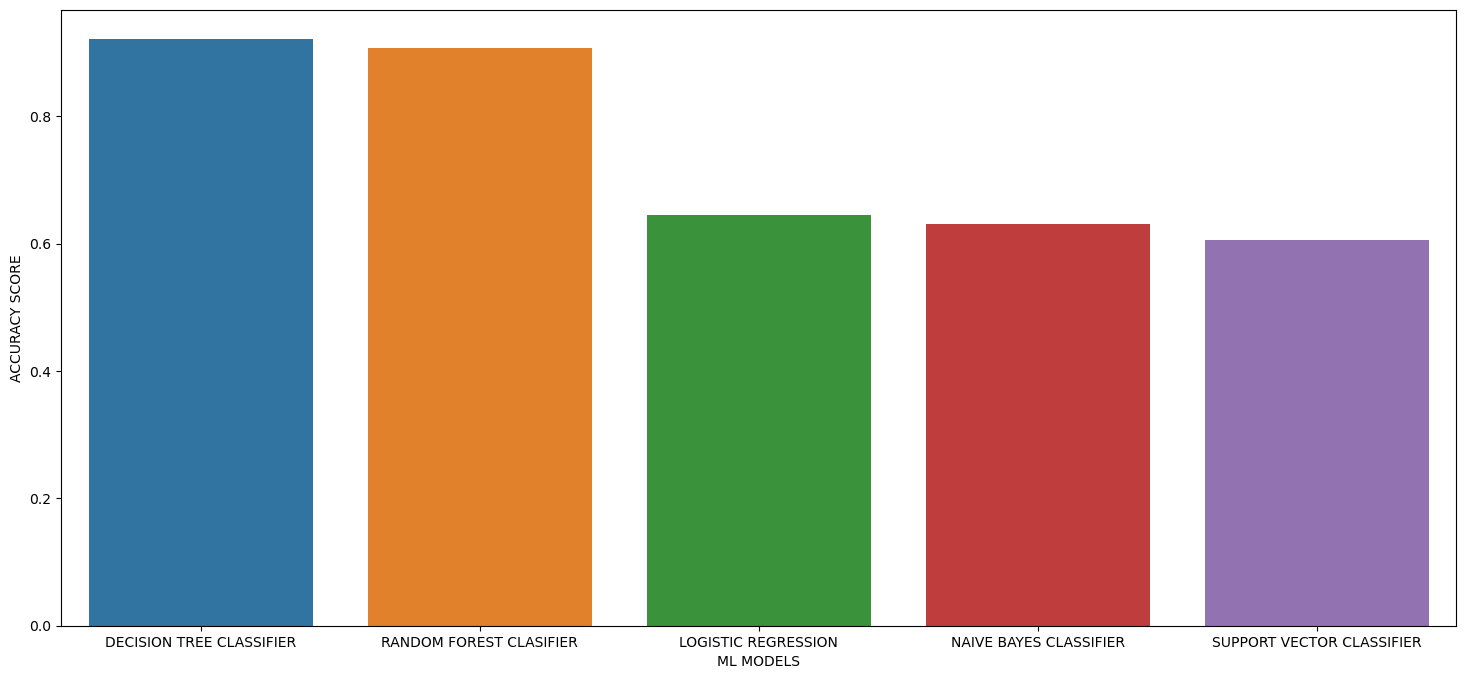

In [226]:
pred_df = pd.DataFrame({"ML MODELS" : ["LOGISTIC REGRESSION","DECISION TREE CLASSIFIER","RANDOM FOREST CLASIFIER","SUPPORT VECTOR CLASSIFIER","NAIVE BAYES CLASSIFIER"],
                       "ACCURACY SCORE" : [LG_accuracy,DTR_accuracy,RF_accuracy,SVC_accuracy,NB_accuracy]})

pred_df = pred_df.sort_values(by="ACCURACY SCORE",ascending=False)
print(pred_df)
plt.figure(figsize=((18,8)))
sns.barplot(x="ML MODELS",y="ACCURACY SCORE",data=pred_df)

## CONCLUSION

##### DECISION TREE CLASSIFIER MODEL GOT THE HIGHEST ACCURACY.